# Transcripción y análisis de parámetros de audio
### Generación de base de datos con características de audios.
En este notebook, se muestra el proceso de análisis de archivos de audio tipo .wav, en donde además de estudiar las variaciones del sonido de notas de voz, se realiza la obtención de la información escencial del audio, como su transcripción, idioma y duración, así como los valores de parámetros como Tempo, ZCR, Energía y picos en la envolvente del sonido. Esta información será útil para identificar situaciones de alarma o estrés en la voz.
 
### Los principales objetivos de este notebook son:
- Transcribir y analizar archivos de audio para la obtención de datos.
- Generar una base de datos .csv que concentre la información.
- Obtener la base de código para estructurar una función de análisis de audio, para aplicaciones de machine learning.

### Las principales librerías a utilizar son:
- Librosa
- Wisper (OPEN AI)


## Análisis de los parámetros de sonido
### Duración, Tempo, ZCR, Energía y picos en la envolvente del sonido.

A continuación, una breve descripción de los parámetros a analizar.

-El tempo es la velocidad del ritmo de la música, generalmente medido en pulsos por minuto (BPM, por sus siglas en inglés). Detecta los momentos en los que ocurren los beats. El tempo de un grito puede estar entre 90-120 BPM, que es un rango moderado.

-La tasa de cruce por cero (ZCR, por sus siglas en inglés) mide cuántas veces la señal cambia de signo en un intervalo de tiempo dado, lo que puede indicar cuán "aguda" o "rítmica" es una señal. Varía entre 0 (sin cruces) y un valor máximo que depende de la longitud de la señal, pero generalmente un ZCR alto puede indicar sonidos percutivos o ruidosos. Rango típico para gritos: 0.1 - 0.3 cruces por muestra.

-La energía en un archivo de audio está relacionada con la amplitud de la señal a lo largo del tiempo. Los valores de energía pueden estar entre 0.1 y 1 (dependiendo de la amplitud de la señal y la cercanía al micrófono).

-Los picos en la envolvente se refieren a los puntos donde la amplitud de la señal alcanza su valor máximo dentro de un determinado intervalo. Los gritos estresados tienden a tener picos agudos y rápidos en su envolvente.

Duración del audio: 5.613514739229025 segundos
Tempo detectado: [135.99917763] BPM (latidos por minuto)
Ritmo rápido detectado: posible situación de estrés o emergencia.


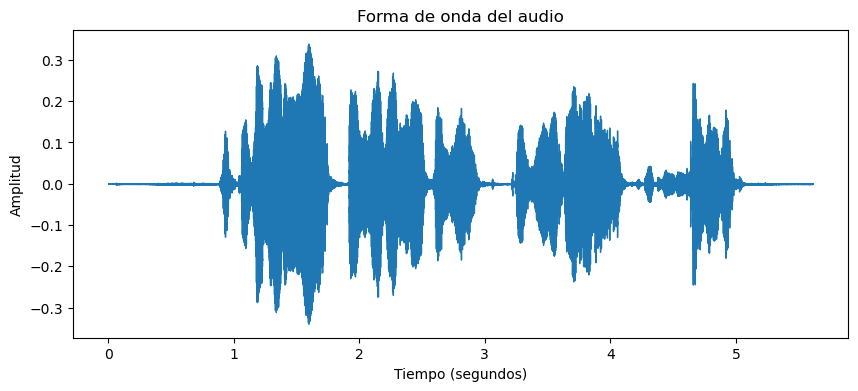

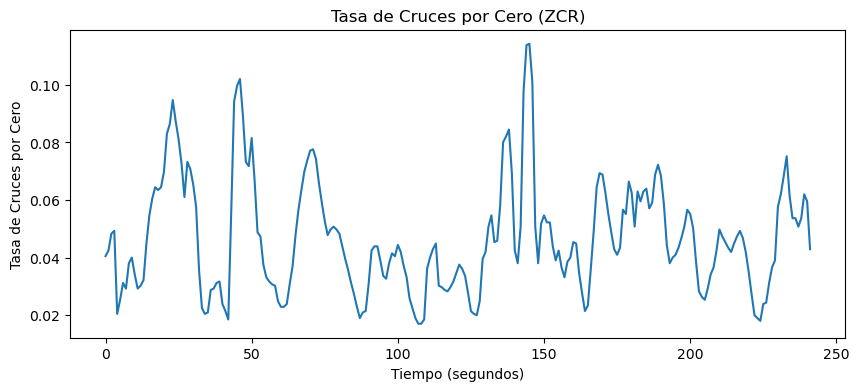

Tasa de cruces por cero baja: sonido más estable.
Energía total del audio: 365.2601318359375
Energía moderada detectada.


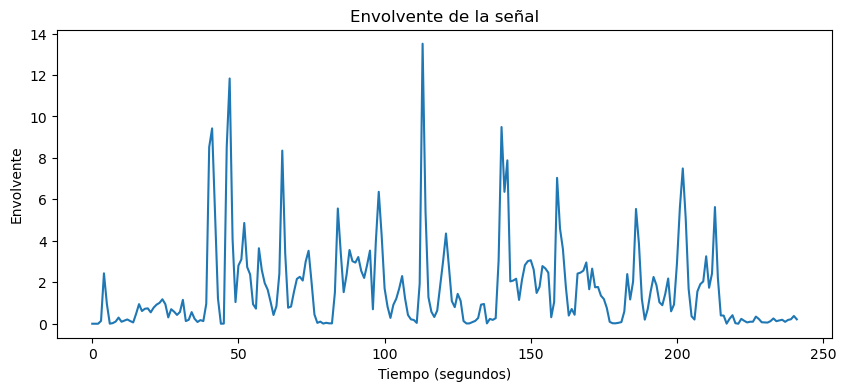

Envolvente estable: sin indicios de cambios bruscos o estrés.


In [42]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo de audio
audio_path = 'voice_message.wav'  # ruta al archivo
y, sr = librosa.load(audio_path)  # 'y' es el vector de audio y 'sr' es la tasa de muestreo

# Calcular la duración del audio
duration = librosa.get_duration(y=y, sr=sr)
print(f"Duración del audio: {duration} segundos")  # Imprime la duración del audio en segundos

# 1. Detección del Tempo (ritmo)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)  # Detecta el tempo de la señal de audio
print(f"Tempo detectado: {tempo} BPM (latidos por minuto)")  # Imprime el tempo detectado

tempo = float(tempo[0]) #convierte tempo a una variable float en lugar de numpy array

# Interpretación del Tempo
if tempo > 115:
    print("Ritmo rápido detectado: posible situación de estrés o emergencia.")  # Si el tempo es alto, puede indicar estrés
elif tempo < 70:
    print("Ritmo lento detectado: podría indicar una situación tranquila.")  # Si el tempo es bajo, puede indicar tranquilidad
else:
    print("Ritmo moderado detectado.")  # Si el tempo es intermedio, se considera un ritmo normal

# 2. Cálculo de la tasa de cruces por cero (ZCR)
zcr = librosa.feature.zero_crossing_rate(y)  # Calcula la tasa de cruces por cero (ZCR) para la señal de audio

# Visualización de la forma de onda y la tasa de cruces por cero
plt.figure(figsize=(10, 4))  # Crea una figura para visualizar la forma de onda
librosa.display.waveshow(y, sr=sr)  # Muestra la forma de onda del audio
plt.title('Forma de onda del audio')  # Título del gráfico
plt.xlabel('Tiempo (segundos)')  # Etiqueta del eje X (tiempo)
plt.ylabel('Amplitud')  # Etiqueta del eje Y (amplitud de la señal)
plt.show()  # Muestra el gráfico de la forma de onda

plt.figure(figsize=(10, 4))  # Crea una nueva figura para visualizar ZCR
plt.plot(zcr.T)  # Muestra la tasa de cruces por cero (ZCR) a lo largo del tiempo
plt.title('Tasa de Cruces por Cero (ZCR)')  # Título del gráfico
plt.xlabel('Tiempo (segundos)')  # Etiqueta del eje X (tiempo)
plt.ylabel('Tasa de Cruces por Cero')  # Etiqueta del eje Y (ZCR)
plt.show()  # Muestra el gráfico de ZCR

# Interpretación de la ZCR
average_zcr = np.mean(zcr)  # Calcula el valor promedio de la ZCR
if average_zcr > 0.1:
    print("Alta tasa de cruces por cero detectada: puede indicar respiración rápida o irregular.")  # ZCR alta indica ruido o irregularidades en el audio
else:
    print("Tasa de cruces por cero baja: sonido más estable.")  # ZCR baja indica que el sonido es más estable

# 3. Energía del audio
energy = np.sum(y**2)  # Calcula la energía total de la señal (suma de los cuadrados de las muestras)
print(f"Energía total del audio: {energy}")  # Imprime el valor de la energía total

# Interpretación de la Energía
if energy > 1e3:
    print("Alta energía detectada: posible aumento de tensión o actividad intensa.")  # Alta energía puede indicar actividad intensa o estrés
else:
    print("Energía moderada detectada.")  # Energía moderada indica actividad normal

# 4. Estimación de respiración rápida (Frecuencia de la respiración)
# Para detectar respiración rápida, se observan los picos en la energía y la envolvente

# Cálculo de la envolvente del audio para detectar cambios bruscos
envelope = librosa.onset.onset_strength(y=y, sr=sr)  # Calcula la fuerza de los onset (transiciones o cambios bruscos)

# Visualización de la envolvente del audio
plt.figure(figsize=(10, 4))  # Crea una figura para visualizar la envolvente
plt.plot(envelope)  # Muestra la envolvente de la señal de audio
plt.title('Envolvente de la señal')  # Título del gráfico
plt.xlabel('Tiempo (segundos)')  # Etiqueta del eje X (tiempo)
plt.ylabel('Envolvente')  # Etiqueta del eje Y (valor de la envolvente)
plt.show()  # Muestra el gráfico de la envolvente

# Interpretación de la envolvente
average_envelope = np.mean(envelope)  # Calcula el valor promedio de la envolvente
if average_envelope > 2.02:
    print("Picos en la envolvente detectados: puede indicar aumento en la tensión o respiración rápida.")  # Si el promedio de la envolvente es alto, puede indicar estrés o respiración rápida
else:
    print("Envolvente estable: sin indicios de cambios bruscos o estrés.")  # Si la envolvente es estable, no se detectan signos de estrés

if average_envelope > 2.02 and tempo > 90 and energy > 1e3:
    estres=1
else:
    estres=0

## Uso de Wisper para transcribir y traducir un audio a texto.

In [43]:
import whisper
import pandas as pd
import os
import warnings


# Cargar el modelo Whisper
model = whisper.load_model("base")  # Puedes elegir entre "tiny", "base", "small", "medium", "large"

# Ruta al archivo de audio
audio_path = 'voice_message.wav'  # Reemplaza con la ruta a tu archivo de audio

# Cargar el audio y obtener la transcripción
result = model.transcribe(audio_path, language="es")  # Siempre transcribe al español
transcription = result['text']

# Si el idioma original no es español, Whisper lo detectará automáticamente y traducirá.
language_detected = result['language']

# Calcular el número de palabras
word_count = len(transcription.split())

# Suprimir FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message="FP16 is not supported on CPU")

#imprime los resultados
print(f' Texto: {transcription} \n Idioma:{language_detected} \n palabras: {word_count}')


 Texto:  Está saliendo humo de un tubo. Eso es normal, ayuda. 
 Idioma:es 
 palabras: 10


### Finalmente, los datos se almacenan en dataframe, y se convierten en un archivo .json

In [46]:
import pandas as pd
import os
import json

# Agregar los valores al DataFrame
df_dic = {
    'nombre_audio': audio_path,
    'texto': transcription,
    'idioma_audio': language_detected,
    'palabras': word_count,
    'duracion': duration,
    'tempo': tempo,
    'zcr': average_zcr,
    'energia': energy,
    'picos_env': average_envelope,
    'estres': estres
}

# Convertir el diccionario en un DataFrame
df = pd.DataFrame([df_dic])

# Guardar el DataFrame actualizado en el archivo JSON
json_path = 'audios_data.json'
df.to_json(json_path, orient='records', lines=True)

# Mostrar el DataFrame para confirmar que los datos se han guardado correctamente
print("\nDatos guardados en el archivo JSON:")
df.head()


Datos guardados en el archivo JSON:


,nombre_audio,texto,idioma_audio,palabras,duracion,tempo,zcr,energia,picos_env,estres
0,voice_message.wav,"Está saliendo humo de un tubo. Eso es normal,...",es,10,5.613515,135.999178,0.046821,365.260132,1.736341,0
